In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# carrega dataset 2020
df_enem_2020 = pd.read_csv('../../data/enem_2020.csv')

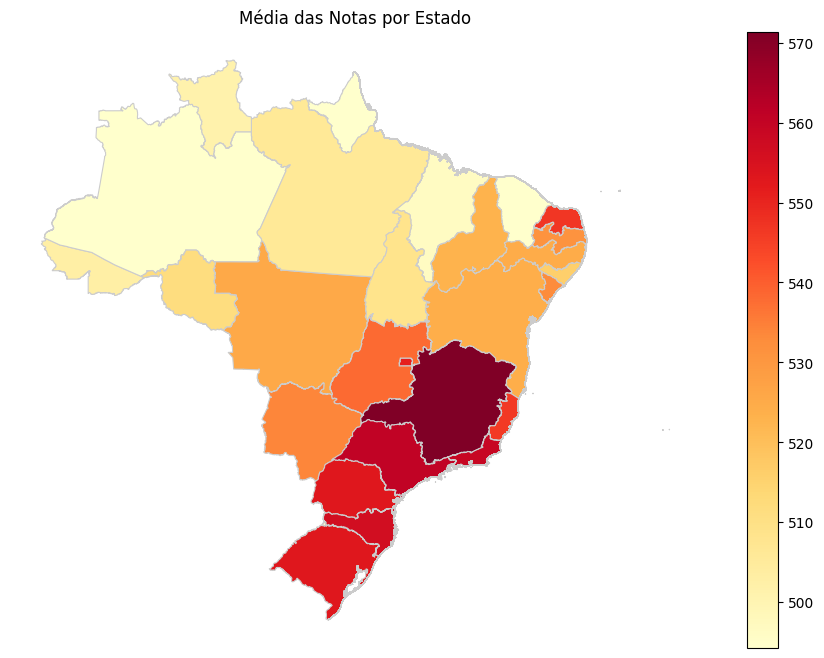

In [3]:

# Carregar o mapa geoespacial
mapa = gpd.read_file('../../data/brazil_geo.json')

# Calcular a média das notas das colunas especificadas
df_enem_2020['media_notas'] = df_enem_2020[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

# Mesclar os dados do mapa com as médias de notas
mescla = mapa.merge(df_enem_2020.groupby('SG_UF_ESC')['media_notas'].mean().reset_index(), left_on='id', right_on='SG_UF_ESC', how='left')

# Criar o gráfico
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mescla.plot(column='media_notas', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurações do gráfico
ax.set_title('Média das Notas por Estado')
ax.set_axis_off()

# Mostrar o gráfico
plt.show()